<a href="https://www.kaggle.com/code/mesutssmn/satellite-image-classification?scriptVersionId=214201270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:40px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:150%; text-align:left">

    
<h3 align="center"><font color='#FFB299' size=150%>SATELLITE IMAGE CLASSIFICATION</font></h3>

    
    
<h4 align="left"><font color='#FFB299' size=5%>To Do :</font></h4>
    
     
<li> Creating Paths and CNN Modelling</li>
    
<h3 align="left"><font color='#FFB299' size=5%>ABOUT DATA :</font></h3>
    
Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot
    
You can find more information about Dataset [here](https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification)    
   
    
<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://wmo.int/sites/default/files/2023-03/AdobeStock_580430822.jpeg" alt="Satellite" width="1000">
</div>
    
    
<div style="border-radius: 10px; overflow: hidden; text-align: right;">
    <img src="https://media.licdn.com/dms/image/v2/D4E12AQHcXWo7sPm2Cg/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1703539076826?e=2147483647&v=beta&t=aWih6gNDFYgiwN6RiH2yiQGTlNMUyfsCdRrGRxqpmsQ" alt="Satellite" width="1000">
</div>
    
</div>
    

# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

In [1]:
!nvidia-smi

Sat Dec 21 19:11:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> IMPORT LIBRARIES </div>

In [2]:
# Base Libraries
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing and Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import shutil

import warnings
warnings.filterwarnings("ignore")

# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> LOADING DATA </div>

In [3]:
base_dir = '/kaggle/input/satellite-image-classification/data'
split_base_dir = '/kaggle/working/satellite_data_split'
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'val')
test_dir = os.path.join(split_base_dir, 'test')

for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_files, test_files = train_test_split(images, test_size=0.1, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

        for split, files in zip([train_dir, val_dir, test_dir], [train_files, val_files, test_files]):
            class_split_dir = os.path.join(split, class_dir)
            os.makedirs(class_split_dir, exist_ok=True)
            for file_name in files:
                shutil.copy(os.path.join(class_path, file_name), os.path.join(class_split_dir, file_name))

# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> IMAGE GENERATION </div>

In [4]:
#train_dir = "/kaggle/input/satellite-image-classification/data"

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                            rescale=1./255,
                                            rotation_range=30,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            validation_split=0.2,
                                            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(train_dir,
                                            target_size=(128,128),
                                            batch_size=128,
                                            class_mode='categorical',
                                            #subset = 'training',
                                            color_mode='rgb')

val_data = train_datagen.flow_from_directory(val_dir,
                                            target_size=(128,128),
                                            batch_size=128,
                                            class_mode='categorical',
                                            #subset = 'validation',
                                            color_mode='rgb')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(128,128),
                                            batch_size=128,
                                            class_mode='categorical',
                                            color_mode='rgb',
                                            shuffle=False)


Found 4053 images belonging to 4 classes.
Found 1014 images belonging to 4 classes.
Found 564 images belonging to 4 classes.


# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> CNN MODEL </div>

In [6]:
conv_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(128,128,3),
    pooling='max'
)
conv_model.trainable = False
conv_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
model = tf.keras.models.Sequential()
model.add(conv_model)
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(train_data.num_classes, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy', 'f1_score'])

callbacks = [
tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
    min_delta = 0.001,
    mode="max",
    patience = 3,
    verbose = 1,
    restore_best_weights = True),
    
tf.keras.callbacks.ModelCheckpoint(
    filepath='./model.keras',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]

In [9]:
history = model.fit(train_data, validation_data = val_data, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 896ms/step - accuracy: 0.5243 - f1_score: 0.5114 - loss: 1.4318 - val_accuracy: 0.9231 - val_f1_score: 0.9203 - val_loss: 0.2983
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 513ms/step - accuracy: 0.8528 - f1_score: 0.8491 - loss: 0.3938 - val_accuracy: 0.9546 - val_f1_score: 0.9545 - val_loss: 0.1885
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 512ms/step - accuracy: 0.9047 - f1_score: 0.9032 - loss: 0.2967 - val_accuracy: 0.9665 - val_f1_score: 0.9661 - val_loss: 0.1533
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 508ms/step - accuracy: 0.9174 - f1_score: 0.9167 - loss: 0.2312 - val_accuracy: 0.9675 - val_f1_score: 0.9670 - val_loss: 0.1472
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 505ms/step - accuracy: 0.9309 - f1_score: 0.9305 - loss: 0.2043 - val_accuracy: 0.9625 - val_f1_score: 0.9631 - val_loss: 0.1294
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 515ms/step - accuracy: 0.9416 - f1_score: 0.9413 - loss: 0.1825 - val_accuracy: 0.9763 - val_f1_score: 

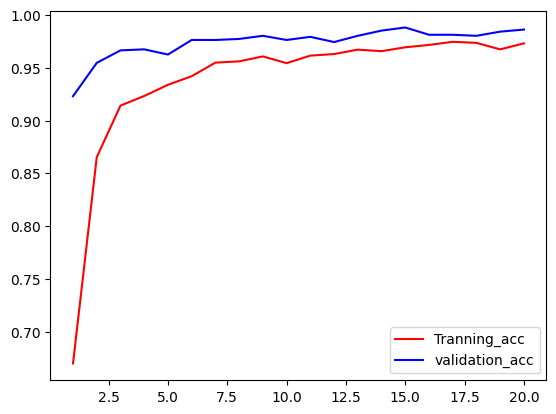

In [10]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "b", label="Tranning_acc", color = "red")
plt.plot(epochs, val_acc, "b", label="validation_acc", color = "blue")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(train_data,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 534ms/step - accuracy: 0.9880 - f1_score: 0.9884 - loss: 0.0399
Accuracy: 98.45%
Loss:  0.04634376987814903


In [12]:
predictions = model.predict(test_data, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


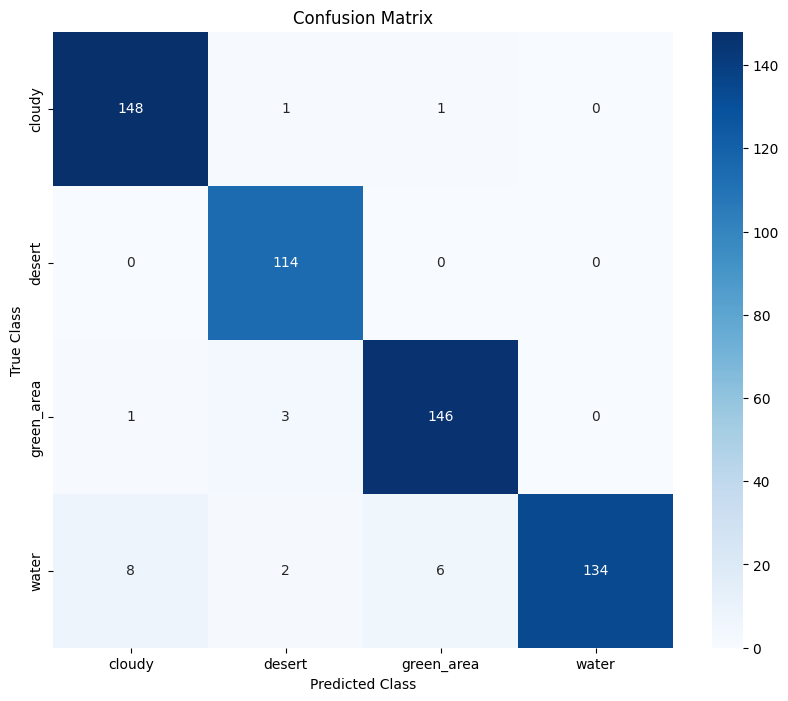

In [13]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> IMAGE PREDICTION </div>

In [14]:
def predict_img(image, model, class_indices=val_data.class_indices):
    test_img = cv2.imread(image)
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (128, 128))
    test_img = test_img / 255.0
    test_img = np.expand_dims(test_img, axis=0)
    result = model.predict(test_img)
    r = np.argmax(result)
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[r]
    print(f"Estimated Class: {predicted_class}")
    plt.imshow(test_img_rgb)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Estimated Class: cloudy


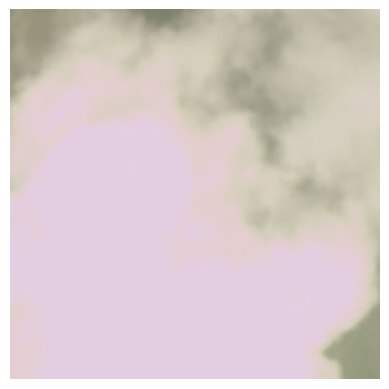

In [15]:
img_path = "/kaggle/input/satellite-image-classification/data/cloudy/train_10021.jpg"
predict_img(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Estimated Class: desert


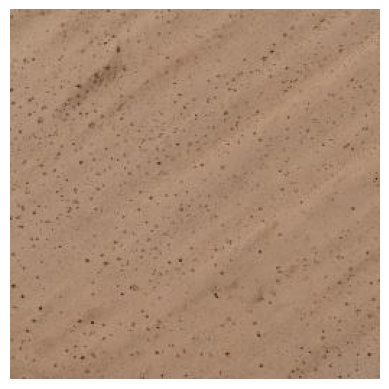

In [16]:
img_path = "/kaggle/input/satellite-image-classification/data/desert/desert(10).jpg"
predict_img(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Estimated Class: water


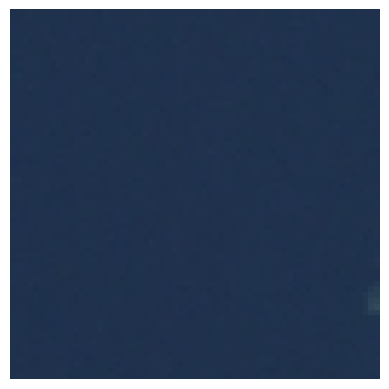

In [17]:
img_path = "/kaggle/input/satellite-image-classification/data/water/SeaLake_1022.jpg"
predict_img(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Estimated Class: green_area


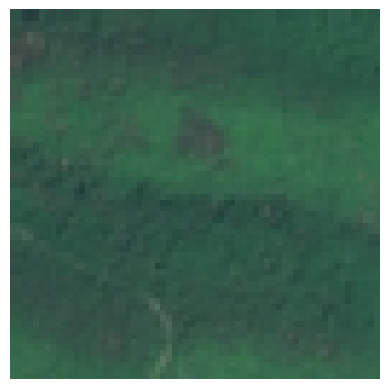

In [18]:
img_path = "/kaggle/input/satellite-image-classification/data/green_area/Forest_1763.jpg"
predict_img(img_path, model)

# <div style="border-radius:10px; border:#557 solid; padding: 12px; background-color: #026d8b; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color: #FFB233"> CONCLUSION </div>

Based on the confusion matrix and provided examples, the model demonstrates strong performance in distinguishing most classes. However, some misclassifications, particularly between the "cloudy" and "water" classes, are evident in the confusion matrix.

**Key Observations:**

Cloudy Class: The "cloudy" class achieves high accuracy with minimal misclassifications.

Water and Green Area Classes: Both are correctly classified most of the time, although occasional errors are observed.

Desert Class: While the "desert" class performs relatively well, there are noticeable confusions between the "desert" and "cloudy" classes. These cases may warrant further investigation to determine if the misclassifications stem from ambiguous features or incorrect labeling in the dataset.

**Conclusion:**

Overall, the model demonstrates promising results, achieving high accuracy across most classes. However, improvements are necessary to minimize errors between challenging pairs such as "cloudy" and "desert." While data augmentation has already been applied, exploring more targeted or advanced augmentation techniques could further enhance model performance.